In [42]:
from sudoku import Sudoku
import pandas as pd
import numpy as np
import os
from collections import Counter
from random import choices, choice
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [43]:
# Unsolved 9x9 sudoku with 80 clues
#s = Sudoku("327456891918372546465981732532864179791523684846719253653148927279630418184297365")

# Unsolved 9x9 sudoku with 75 clues
#s = Sudoku("192700658437865912560291347749358126053612479216947583625179830971483265084526791")

# Unsolved 9x9 sudoku with 75 clues
#s = Sudoku("192700658437865912560291347749358126053612479216947583625179830971483265084526791")

# Unsolved 9x9 sudoku with 17 clues
# s = Sudoku("600000900020000000000000000000000059100080000000300200005060407890040000004000000")

# Solved 9x9 sudoku with 17 clues
#s = Sudoku("683417925529638174471592386367124859142985763958376241215869437896743512734251698")


In [44]:
base_file_path = "/".join(os.getcwd().split("/")[:-3])
sudoku_file_path = f"{base_file_path}/sudoku_cluewise.csv"
def load_file_sudoku(file_path):
    df = pd.read_csv(file_path)

    selected_columns = df[['quizzes', 'clue_numbers']]
    return selected_columns

In [45]:
chosen_difficulty = 17
df = load_file_sudoku(sudoku_file_path)
if chosen_difficulty != None:
    df = df[df["clue_numbers"] == chosen_difficulty]
    #Reset the index
    df = df.reset_index()


In [46]:
#Print a sample of Board:
sample = Sudoku(df["quizzes"][0])
sample.printBoard()
print(f"Sudoku is solved: {sample.isSolved()}")
print(f"Possible Moves: {sample.getPossibleMoves()}")

print(f"After doing a move ((0,4),3):")
sample.doMove((0,3),7)
sample.printBoard()

    3 |   9   |       
  7   |   3 8 |       
      |       |     3 
---------------------
8     |       |   7 4 
6 9   |       |     5 
      |       |       
---------------------
      |       |       
    6 | 3     |     8 
    7 |     1 |       
Sudoku is solved: False
Possible Moves: {(0, 0): [1, 2, 4, 5], (0, 1): [1, 2, 4, 5, 6, 8], (0, 3): [1, 2, 4, 5, 6, 7], (0, 5): [2, 4, 5, 6, 7], (0, 6): [1, 2, 4, 5, 6, 7, 8], (0, 7): [1, 2, 4, 5, 6, 8], (0, 8): [1, 2, 6, 7], (1, 0): [1, 2, 4, 5, 9], (1, 2): [1, 2, 4, 5, 9], (1, 3): [1, 2, 4, 5, 6], (1, 6): [1, 2, 4, 5, 6, 9], (1, 7): [1, 2, 4, 5, 6, 9], (1, 8): [1, 2, 6, 9], (2, 0): [1, 2, 4, 5, 9], (2, 1): [1, 2, 4, 5, 6, 8], (2, 2): [1, 2, 4, 5, 8, 9], (2, 3): [1, 2, 4, 5, 6, 7], (2, 4): [1, 2, 4, 5, 6, 7], (2, 5): [2, 4, 5, 6, 7], (2, 6): [1, 2, 4, 5, 6, 7, 8, 9], (2, 7): [1, 2, 4, 5, 6, 8, 9], (3, 1): [1, 2, 3, 5], (3, 2): [1, 2, 5], (3, 3): [1, 2, 5, 6, 9], (3, 4): [1, 2, 5, 6], (3, 5): [2, 3, 5, 6, 9], (3, 6): [1, 2, 3, 6, 9], (4, 2)

In [47]:
def tuples_liste_taille_1(dictionnaire):
    resultats = [cle for cle, valeur in dictionnaire.items() if len(valeur) == 1]
    return resultats

In [48]:
def incomplete_solver(sample):
    restart = 0
    solutionFound = False
    start_time = datetime.now()

    while not solutionFound:
        s = Sudoku(sample)
        moves = s.getPossibleMoves()

        if len(tuples_liste_taille_1(moves)) > 0:
            coords = tuples_liste_taille_1(moves)[0]
            s.doMove(coords, moves[coords][0])
        else:
            movesBis = []
            for move in moves:
                movesBis.append(((move), len(moves[move])))

            uniquePossibilities = list(set([x[1] for x in movesBis]))
            # print(moves)
            probabilites = [1 / valeur for valeur in uniquePossibilities]
            probabilites_normalized = [prob / sum(probabilites) for prob in probabilites]
            occurencesOfPossibilities = dict(Counter([x[1] for x in movesBis]))

            probas = {}
            for i in range(len(probabilites_normalized)):
                probas[uniquePossibilities[i]] = probabilites_normalized[i] / occurencesOfPossibilities[
                    uniquePossibilities[i]]

            movesBis = [(x[0], probas[x[1]]) for x in movesBis]

            cellChosen = choices([x[0] for x in movesBis], weights=[x[1] for x in movesBis])[0]
            numberChosen = choice(moves[cellChosen])
            s.doMove(cellChosen, numberChosen)

        if s.isSolved():
            break

        moves = s.getPossibleMoves()

        if not s.isThereAMove():
            s = Sudoku(sample)
            restart += 1

        for m in moves:
            if len(moves[m]) == 0:
                # print(m)
                # print("Locked")
                s = Sudoku(sample)
                restart += 1
                break

        moves = s.getPossibleMoves()

        # s.printBoard()
        # print("\n##############################################\n")

    end_time = datetime.now()
    elapsed_time = end_time - start_time
    elapsed_time = elapsed_time.total_seconds()

    return elapsed_time, restart


In [49]:
## Testing

# elapsed_time, restart = incomplete_solver(df["quizzes"][1])
df["quizzes"]

0        0030900000700380000000000038000000746900000050...
1        0000000600009001809401000000600000000000000900...
2        0070400630000000000800000075002000900024000000...
3        0005060400000400000000000000300000900500000000...
4        4000600020000000300800010000400000000900100007...
                               ...                        
62495    0005060000020000500600000170000000002300000000...
62496    0040020000000900000060000001000400000900004004...
62497    0000050000000001000902000000450000000600003000...
62498    0090000007300000055000000006000080000050000000...
62499    0000000090000000000800000010000000002040010306...
Name: quizzes, Length: 62500, dtype: object

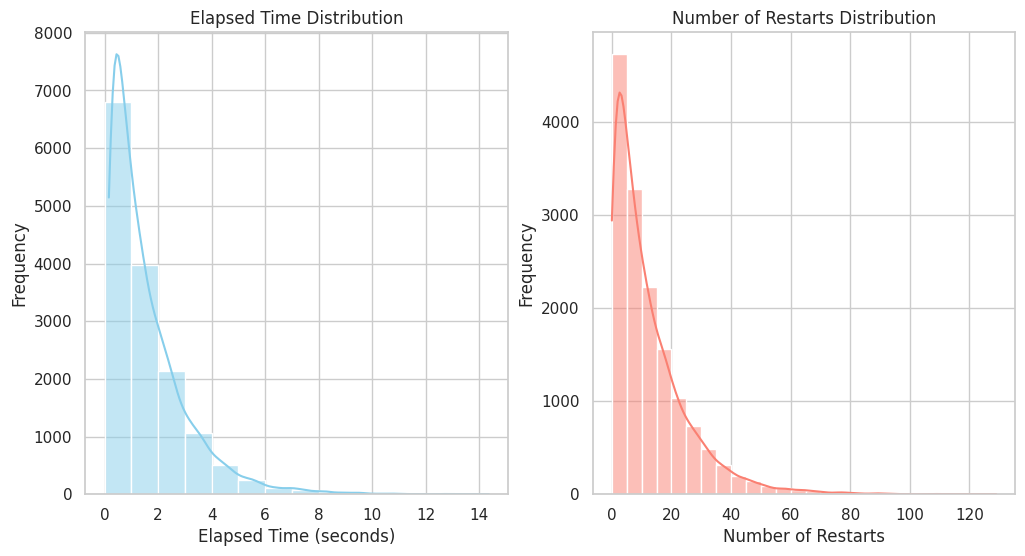

In [50]:
## Get data -> Running takes too much time -> Run only 1 time

# list_elapsed_time = []
# list_restart = []

# for i in tqdm(range(len(df))[:15000]):
#     elapsed_time, restart = incomplete_solver(Sudoku(df["quizzes"][i]))
#     list_elapsed_time.append(elapsed_time)
#     list_restart.append(restart)

with open("list_elapsed_time.pkl", 'rb') as file:
    list_elapsed_time = list(pickle.load(file))
with open("list_restart.pkl", 'rb') as file:
    list_restart = list(pickle.load(file))


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(list_elapsed_time, bins=range(0, 11,1), kde=True, color="skyblue")
plt.title('Elapsed Time Distribution')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(list_restart, bins=range(0, 71, 5), kde=True, color="salmon")
plt.title('Number of Restarts Distribution')
plt.xlabel('Number of Restarts')
plt.ylabel('Frequency')

plt.savefig("Incomplete_Approach.png", dpi = 300)
plt.show()


In [51]:
# with open("list_elapsed_time.pkl", 'wb') as file:
#     pickle.dump(np.asarray(list_elapsed_time), file)
# with open("list_restart.pkl", 'wb') as file:
#     pickle.dump(np.asarray(list_restart), file)


stats_elapsed_time= {
    'mean': np.mean(list_elapsed_time),
    'std': np.std(list_elapsed_time),
    '25th percentile': np.percentile(list_elapsed_time, 25),
    '50th percentile (median)': np.median(list_elapsed_time),
    '75th percentile': np.percentile(list_elapsed_time, 75)
}

stats_restart = {
    'mean': np.mean(list_restart),
    'std': np.std(list_restart),
    '25th percentile': np.percentile(list_restart, 25),
    '50th percentile (median)': np.median(list_restart),
    '75th percentile': np.percentile(list_restart, 75)
}

# Print the statistics
print("Statistics for elapsed_time:")
for key, value in stats_elapsed_time.items():
    print(f"{key}: {value}")

print("\nStatistics for restart:")
for key, value in stats_restart.items():
    print(f"{key}: {value}")


Statistics for elapsed_time:
mean: 1.589761871
std: 1.46965347940634
25th percentile: 0.54475875
50th percentile (median): 1.138917
75th percentile: 2.16687325

Statistics for restart:
mean: 12.5186
std: 12.894316087847907
25th percentile: 3.0
50th percentile (median): 9.0
75th percentile: 18.0
